In [340]:
import numpy as np
import pandas as pd
import math as m
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [131]:
data = pd.read_csv("C:\\Users\\as17s\\OneDrive\\Documents\\MSc Data Science\\Semester 2\\Cyber Security\\CW2\\Mastering-Machine-Learning-for-Penetration-Testing-master\\Chapter03\\malwaredata.csv", sep = '|')

In [133]:
data

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [342]:
data.drop(['Name', 'md5'], axis = 1, inplace = True)

In [343]:
data

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,332,224,258,9,0,361984,115712,0,6135,4096,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,332,224,3330,9,0,130560,19968,0,81778,4096,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,332,224,3330,9,0,517120,621568,0,350896,4096,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,332,224,258,9,0,585728,369152,0,451258,4096,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,332,224,258,9,0,294912,247296,0,217381,4096,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,332,224,258,11,0,205824,223744,0,123291,4096,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,332,224,33167,2,25,37888,185344,0,40000,4096,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,332,224,258,10,0,118272,380416,0,59610,4096,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,332,224,33166,2,25,49152,16896,0,51216,4096,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [344]:
data_input = data.drop(['legitimate'], axis = 1)
target = data['legitimate']

In [377]:
t =  target.value_counts()/len(target)*100
print('Malicious files make up ' + str(t[0]) + '% of the dataset')
print('Legitimate files make up ' + str(t[1]) + '% of the dataset')

Malicious files make up 70.06599201721153% of the dataset
Legitimate files make up 29.93400798278847% of the dataset


In [346]:
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [347]:
train_data, test_data, train_label, test_label = train_test_split(data_input, target, test_size = 0.2)

In [348]:
scaler = StandardScaler()
scaler.fit(train_data)

train_datas = scaler.transform(train_data)
test_datas = scaler.transform(test_data)

In [349]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import initializers
from tensorflow.keras.optimizers import SGD, Adam

In [350]:
monitor_val_acc = EarlyStopping(monitor = 'val_accuracy', patience = 10)

In [351]:
model = Sequential()
model.add(Dense(27, input_shape = (54,), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 27)                1485      
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 28        
Total params: 1,513
Trainable params: 1,513
Non-trainable params: 0
_________________________________________________________________


In [352]:
model.fit(train_datas, train_label, epochs = 2000, validation_split = 0.1,
                 callbacks = [monitor_val_acc])

Epoch 1/2000
3107/3107 [==============================] - 5s 1ms/step - loss: 0.0701 - accuracy: 0.9793 - val_loss: 0.0374 - val_accuracy: 0.9889
Epoch 2/2000
3107/3107 [==============================] - 5s 1ms/step - loss: 0.0431 - accuracy: 0.9877 - val_loss: 0.0354 - val_accuracy: 0.9892
Epoch 3/2000
3107/3107 [==============================] - 5s 2ms/step - loss: 0.0396 - accuracy: 0.9884 - val_loss: 0.0336 - val_accuracy: 0.9895
Epoch 4/2000
3107/3107 [==============================] - 6s 2ms/step - loss: 0.0370 - accuracy: 0.9888 - val_loss: 0.0335 - val_accuracy: 0.9896
Epoch 5/2000
3107/3107 [==============================] - 5s 2ms/step - loss: 0.0357 - accuracy: 0.9889 - val_loss: 0.0322 - val_accuracy: 0.9893
Epoch 6/2000
3107/3107 [==============================] - 3s 810us/step - loss: 0.0339 - accuracy: 0.9891 - val_loss: 0.0326 - val_accuracy: 0.9899
Epoch 7/2000
3107/3107 [==============================] - 2s 631us/step - loss: 0.0331 - accuracy: 0.9891 - val_loss: 0.03

In [353]:
model.evaluate(test_datas, test_label)

863/863 [==============================] - 0s 427us/step - loss: 0.0353 - accuracy: 0.9893


[0.03533048555254936, 0.9893154501914978]

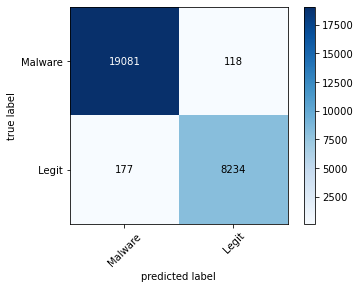

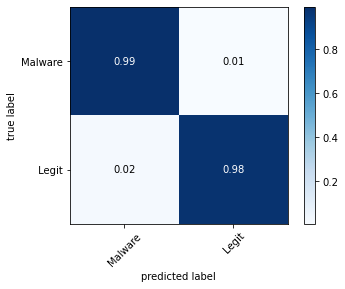

In [354]:
preds = np.round(model.predict(test_datas))

class_names = np.array(['Malware', ' Legit'])

cm = confusion_matrix(np.array(test_label), preds)

plot_confusion_matrix(conf_mat = cm, class_names = class_names, colorbar = True)
plot_confusion_matrix(conf_mat = cm, class_names = class_names, show_absolute = False, show_normed = True, colorbar = True)
plt.show()

In [355]:
def img_convert(data, length, width): 
    final = np.zeros((len(data), length, width))
    for i in range(len(data)):
        new = np.reshape(data[i], (length, width))
        final[i] = new
    return final

def plot(data, x):
    plt.figure(figsize =(20, 20))
    for i in range(x):
        plt.subplot(m.ceil(m.sqrt(x)), m.ceil(m.sqrt(x)), i+1)
        try: 
            plt.imshow(data[i])
        except:
            plt.imshow(data[i].squeeze())
        plt.colorbar()
        plt.grid(False)
    plt.show()

In [356]:
final_train = img_convert(train_datas, 9, 6)
final_test  = img_convert(test_datas, 9, 6)

final_train = np.expand_dims(final_train, -1)
final_test  = np.expand_dims(final_test, -1)

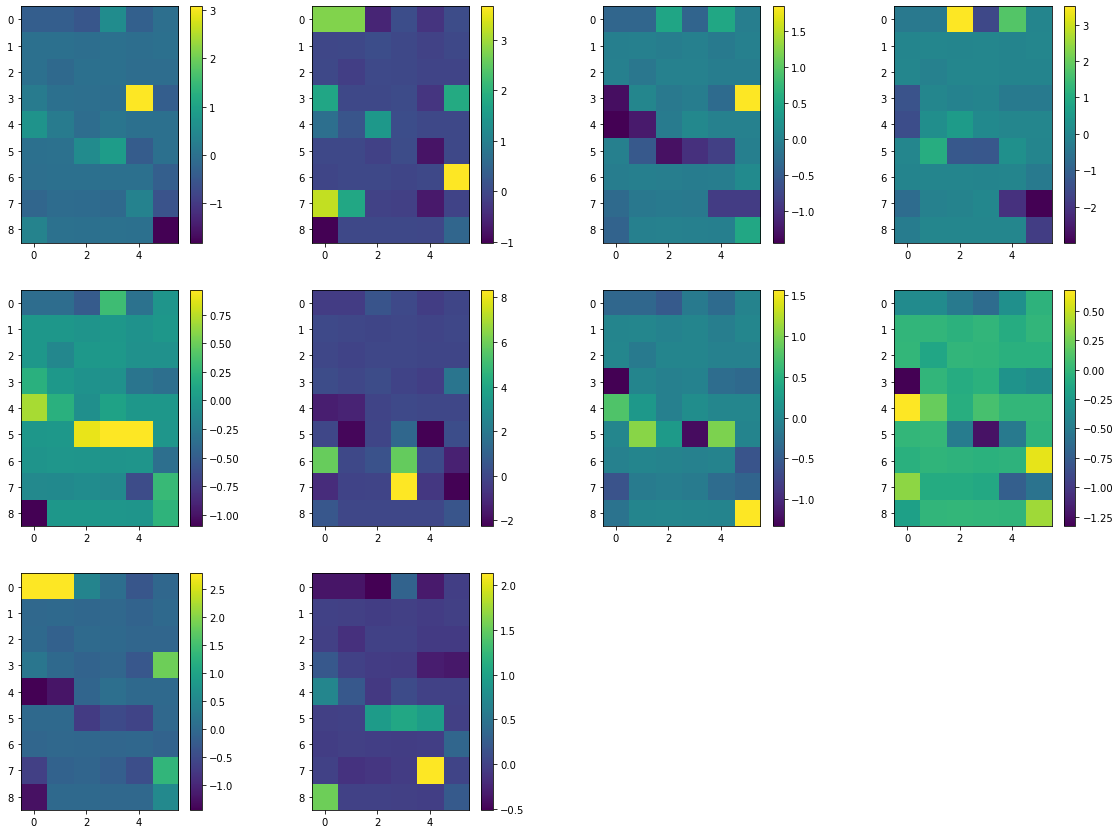

In [357]:
plot(final_train, 10)

In [358]:
model3 = Sequential()
model3.add(Conv2D(128, kernel_size = (4,4), input_shape = (9, 6, 1), activation = 'relu', padding = 'same'))
model3.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model3.add(Flatten())
model3.add(Dropout(0.1))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 9, 6, 128)         2176      
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 7, 4, 64)          73792     
_________________________________________________________________
flatten_34 (Flatten)         (None, 1792)              0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 1792)              0         
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 1793      
Total params: 77,761
Trainable params: 77,761
Non-trainable params: 0
_________________________________________________________________


In [359]:
model3.fit(final_train, train_label, epochs = 100, validation_split = 0.1, callbacks = [monitor_val_acc])

Epoch 1/100
3107/3107 [==============================] - 29s 9ms/step - loss: 0.0564 - accuracy: 0.9839 - val_loss: 0.0374 - val_accuracy: 0.9887
Epoch 2/100
3107/3107 [==============================] - 33s 11ms/step - loss: 0.0416 - accuracy: 0.9875 - val_loss: 0.0328 - val_accuracy: 0.9893
Epoch 3/100
3107/3107 [==============================] - 33s 11ms/step - loss: 0.0384 - accuracy: 0.9881 - val_loss: 0.0308 - val_accuracy: 0.9903
Epoch 4/100
3107/3107 [==============================] - 34s 11ms/step - loss: 0.0342 - accuracy: 0.9887 - val_loss: 0.0286 - val_accuracy: 0.9898
Epoch 5/100
3107/3107 [==============================] - 33s 11ms/step - loss: 0.0319 - accuracy: 0.9896 - val_loss: 0.0294 - val_accuracy: 0.9916
Epoch 6/100
3107/3107 [==============================] - 33s 11ms/step - loss: 0.0306 - accuracy: 0.9903 - val_loss: 0.0269 - val_accuracy: 0.9911
Epoch 7/100
3107/3107 [==============================] - 34s 11ms/step - loss: 0.0287 - accuracy: 0.9908 - val_loss: 0.

In [360]:
model3.evaluate(final_test, test_label)

863/863 [==============================] - 2s 2ms/step - loss: 0.0356 - accuracy: 0.9913


[0.03555348515510559, 0.9913074970245361]

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2c115e6e400>)

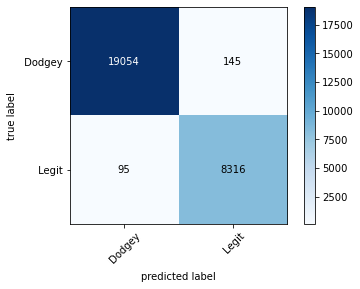

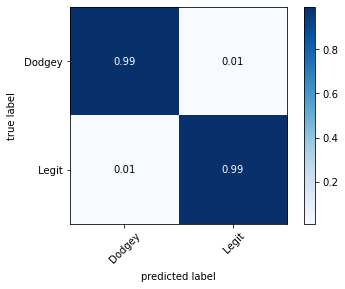

In [361]:
preds = np.round(model3.predict(final_test))

class_names = np.array([' Dodgey', ' Legit'])

cm = confusion_matrix(np.array(test_label), preds)

plot_confusion_matrix(conf_mat = cm, class_names = class_names, colorbar = True)
plot_confusion_matrix(conf_mat = cm, class_names = class_names, show_absolute = False, show_normed = True, colorbar = True)

In [53]:
def lowest_square(x):
    while m.sqrt(x).is_integer() == False:
        x = x - 1
    return x

In [364]:
lowest_square(test_datas.shape[1])

49

In [365]:
pca = PCA(n_components = lowest_square(test_datas.shape[1]))
pca.fit(train_datas)
pcadata_train = pca.transform(train_datas)
pcadata_test = pca.transform(test_datas)

In [366]:
pca.explained_variance_ratio_.sum()

0.9998808069516535

In [367]:
pcadata_test.shape

(27610, 49)

In [368]:
pca_train =  img_convert(pcadata_train, 7, 7)
pca_test  =  img_convert(pcadata_test , 7, 7)

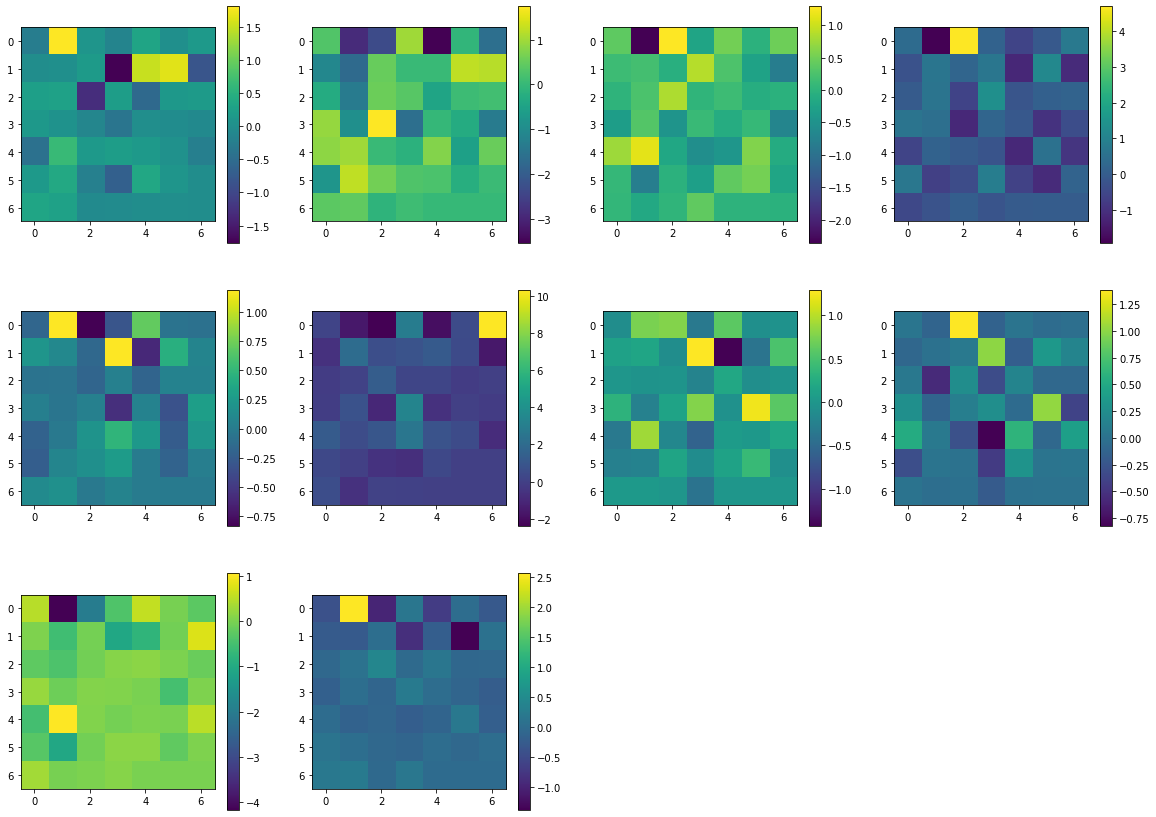

In [369]:
plot(pca_train, 10)

In [370]:
pca_train = np.expand_dims(pca_train, -1)
pca_test  = np.expand_dims(pca_test, -1)

In [371]:
monitor_val_acc = EarlyStopping(monitor = 'val_accuracy', patience = 10)

In [372]:
model10 = Sequential()
model10.add(Conv2D(128, kernel_size = (4,4), input_shape = (7, 7, 1), activation = 'relu', padding = 'same'))
model10.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model10.add(Flatten())
model10.add(Dropout(0.1))
model10.add(Dense(1, activation='sigmoid'))
model10.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model10.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 7, 7, 128)         2176      
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 5, 5, 64)          73792     
_________________________________________________________________
flatten_35 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 1600)              0         
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 1601      
Total params: 77,569
Trainable params: 77,569
Non-trainable params: 0
_________________________________________________________________


In [373]:
model10.fit(pca_train, train_label, epochs = 100, validation_split = 0.1, callbacks = [monitor_val_acc])

Epoch 1/100
3107/3107 [==============================] - 25s 8ms/step - loss: 0.0627 - accuracy: 0.9819 - val_loss: 0.0421 - val_accuracy: 0.9865
Epoch 2/100
3107/3107 [==============================] - 28s 9ms/step - loss: 0.0452 - accuracy: 0.9867 - val_loss: 0.0349 - val_accuracy: 0.9887
Epoch 3/100
3107/3107 [==============================] - 28s 9ms/step - loss: 0.0387 - accuracy: 0.9880 - val_loss: 0.0340 - val_accuracy: 0.9895
Epoch 4/100
3107/3107 [==============================] - 28s 9ms/step - loss: 0.0372 - accuracy: 0.9887 - val_loss: 0.0351 - val_accuracy: 0.9907
Epoch 5/100
3107/3107 [==============================] - 28s 9ms/step - loss: 0.0349 - accuracy: 0.9893 - val_loss: 0.0334 - val_accuracy: 0.9907
Epoch 6/100
3107/3107 [==============================] - 28s 9ms/step - loss: 0.0311 - accuracy: 0.9900 - val_loss: 0.0280 - val_accuracy: 0.9915
Epoch 7/100
3107/3107 [==============================] - 29s 9ms/step - loss: 0.0300 - accuracy: 0.9906 - val_loss: 0.0288 -

In [374]:
model10.evaluate(pca_test, test_label)

863/863 [==============================] - 2s 2ms/step - loss: 0.0501 - accuracy: 0.9914


[0.050069089978933334, 0.9914161562919617]

In [284]:
class malicious:
    
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets
        self.split()
        self.scale_pca()
        self.CNN()
        
        
    def split(self):
        
        self.train_data, self.test_data, self.train_label, self.test_label = train_test_split(self.data,
                                                                                              self.targets, test_size = 0.2)
        
        return self.train_data, self.test_data, self.train_label, self.test_label

    def img_convert(self, data, length, width): 
        
        final = np.zeros((len(data), length, width))
        for i in range(len(data)):
            new = np.reshape(data[i], (length, width))
            final[i] = new
        return final

    def lowest_square(self, x):
        while m.sqrt(x).is_integer() == False:
            x = x - 1
        return x   

    def scale_pca(self):
        
        self.scaler = StandardScaler()
        self.scaler.fit(self.train_data)
        train_data_scale = self.scaler.transform(self.train_data)
        test_data_scale  = self.scaler.transform(self.test_data)

        self.ls = self.lowest_square(self.data.shape[1])
        self.sqrt = int(m.sqrt(self.ls))

        self.pca = PCA(n_components = self.ls)
        self.pca.fit(train_data_scale)
        pcadata_train = self.pca.transform(train_data_scale)
        pcadata_test  = self.pca.transform(test_data_scale)
       
        pca_train =  self.img_convert(pcadata_train, self.sqrt, self.sqrt)
        pca_test  =  self.img_convert(pcadata_test , self.sqrt, self.sqrt)

        self.pca_train = np.expand_dims(pca_train, -1)
        self.pca_test  = np.expand_dims(pca_test, -1)
    
       
        return self.pca, self.scaler, self.ls, self.sqrt, self.pca_train, self.pca_test
    
    def CNN(self):
        
        monitor_val_acc = EarlyStopping(monitor = 'val_accuracy', patience = 10)
    
        self.model = Sequential()
        self.model.add(Conv2D(128, kernel_size = (int(np.round(m.sqrt(self.sqrt))), int(np.round(m.sqrt(self.sqrt)))),
                              input_shape = (self.sqrt, self.sqrt, 1), activation = 'relu', padding = 'same'))
        self.model.add(Conv2D(64, kernel_size = (int(np.round(m.sqrt(self.sqrt))) - 1, int(np.round(m.sqrt(self.sqrt))) - 1),
                              activation = 'relu'))
        self.model.add(Flatten())
        self.model.add(Dropout(0.1))
        self.model.add(Dense(1, activation='sigmoid'))
        self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        self.model.summary()

        self.model.fit(self.pca_train, self.train_label, epochs = 100, validation_split = 0.1, callbacks = [monitor_val_acc])
        
        return self.model
    
    def evaluate(self):
        
        self.model.evaluate(self.pca_test, self.test_label)
        
    def scale_pca_test(self, test):

        test = self.scaler.transform(test)      

        self.ls = self.lowest_square(self.data.shape[1])
        self.sqrt = int(m.sqrt(self.ls))

        test = self.pca.transform(test)

        test =  self.img_convert(test, self.sqrt, self.sqrt)

        test = np.expand_dims(test, -1)

        return test
    
    def plot(self, data, x):
        plt.figure(figsize =(20, 20))
        for i in range(x):
            plt.subplot(m.ceil(m.sqrt(x)), m.ceil(m.sqrt(x)), i+1)
            try: 
                plt.imshow(data[i])
            except:
                plt.imshow(data[i].squeeze())
            plt.colorbar()
            plt.grid(False)
        plt.show()
        

    def conf_matrix(self):
        
        preds = np.round(self.model.predict(self.pca_test))

        class_names = np.array([' Dodgey', ' Legit'])

        cm = confusion_matrix(np.array(self.test_label), preds)

        plot_confusion_matrix(conf_mat = cm, class_names = class_names, colorbar = True)
        plot_confusion_matrix(conf_mat = cm, class_names = class_names, show_absolute = False,
                              show_normed = True, colorbar = True)



In [280]:
phishing =  pd.read_csv('C:\\Users\\as17s\\OneDrive\\Documents\\MSc Data Science\\Semester 2\\Cyber Security\\CW2\\Mastering-Machine-Learning-for-Penetration-Testing-master\\Chapter02\\dataset.csv')

In [291]:
phishing.shape

(11054, 31)

In [297]:
phishing_inputs = phishing[phishing.columns[0:-1]]
phishing_target = phishing[phishing.columns[-1]]

phishing_target = phishing_target.replace([-1], 0)

test_inputs = phishing_inputs[0:500]
test_target = phishing_target[0:500]

phishing_inputs = phishing_inputs[500:]
phishing_target = phishing_target[500:]

In [299]:
phish = malicious(phishing_inputs, phishing_target)

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 5, 5, 128)         640       
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 5, 5, 64)          8256      
_________________________________________________________________
flatten_32 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 1600)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 1601      
Total params: 10,497
Trainable params: 10,497
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
238/238 [==============================] - 1s 3ms/step - loss: 0.2661 - accuracy: 0.9073 - val_loss: 0.

In [300]:
phish.evaluate()

66/66 [==============================] - 0s 923us/step - loss: 0.1091 - accuracy: 0.9569


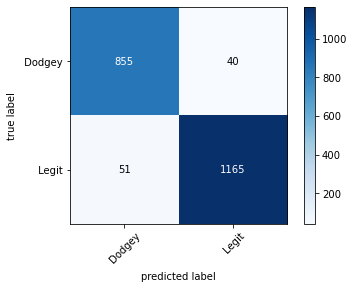

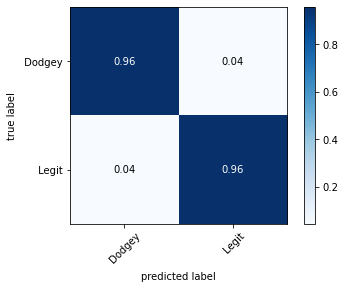

In [338]:
phish.conf_matrix()

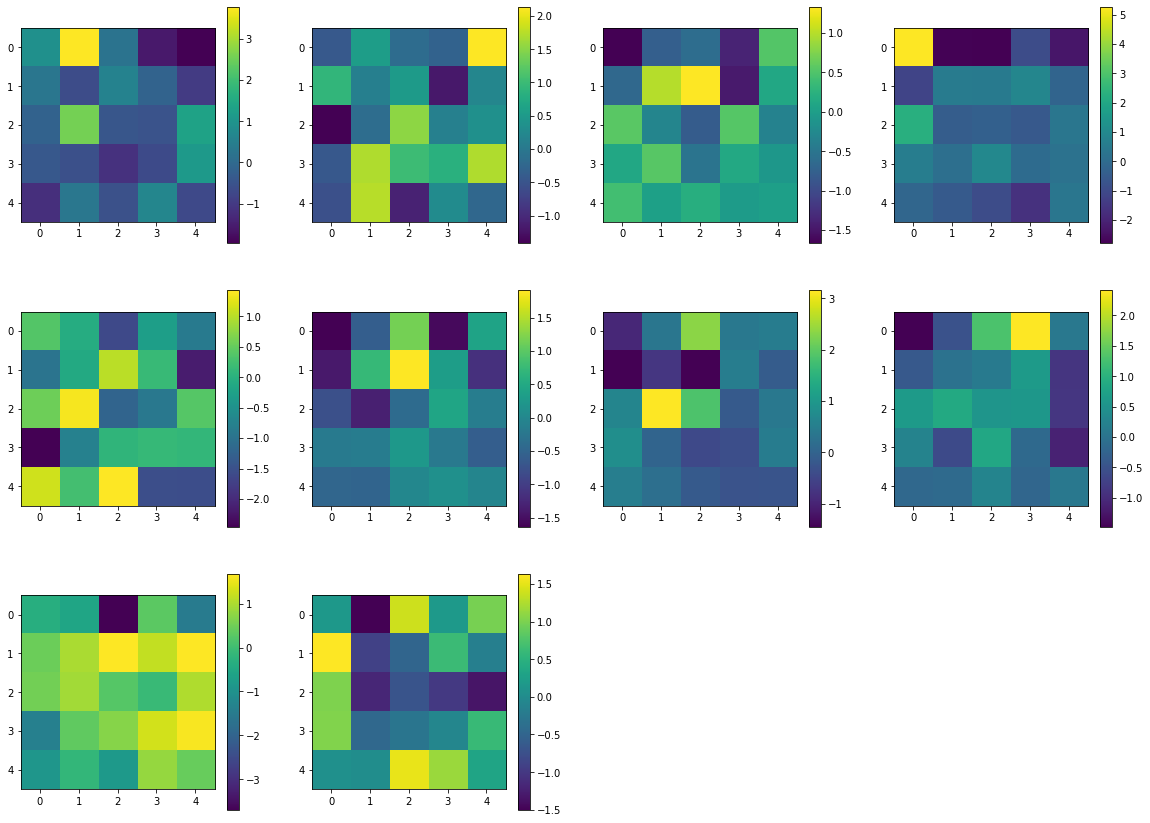

In [302]:
phish.plot(phish.pca_train, 10)

In [303]:
new_test = phish.scale_pca_test(test_inputs)

In [305]:
phish.model.evaluate(new_test, test_target)

16/16 [==============================] - 0s 1ms/step - loss: 0.0801 - accuracy: 0.9740


[0.08013078570365906, 0.9739999771118164]

In [308]:
phish.pca.explained_variance_ratio_.sum()

0.9737885987451659